In [1]:
# Importing used modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

In [2]:
# Importing data and cleaning it up
df = pd.read_csv('../ML-Cancer-SCC-2020-21/Children\'s Oncology Group Study 9906 for High-Risk Pediatric Training Stats (1).csv')

df = df.drop('TRAINING OR TEST SET?', axis = 1)

df = df.drop("Sample", axis =1)

dummies = pd.get_dummies(df['CONGENITAL ABNORMALITY'], drop_first = True, prefix= "CONGENITAL ABNORMALITY")
df = pd.concat([df.drop('CONGENITAL ABNORMALITY', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['CNS STATUS'], drop_first = True, prefix= "CNS STATUS")
df = pd.concat([df.drop('CNS STATUS', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['TESTICULAR INVOLVEMENT'], drop_first = True, prefix= "TESTICULAR INVOLVEMENT")
df = pd.concat([df.drop('TESTICULAR INVOLVEMENT', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['GENDER'], drop_first = True, prefix= "GENDER")
df = pd.concat([df.drop('GENDER', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['E2A-PBX, T(1;19)'], drop_first = True, prefix= "E2A-PBX, T(1;19)")
df = pd.concat([df.drop('E2A-PBX, T(1;19)', axis=1), dummies], axis=1)

df = df.drop("BCR-ABL, T(9;22)", axis =1)

dummies = pd.get_dummies(df['TEL-AML,T(12;21)'], drop_first = True, prefix= "TEL-AML,T(12;21)")
df = pd.concat([df.drop('TEL-AML,T(12;21)', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['TISSUE TYPE'], drop_first = True, prefix= "TISSUE TYPE")
df = pd.concat([df.drop('TISSUE TYPE', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['RACE'], drop_first = True, prefix= "RACE")
df = pd.concat([df.drop('RACE', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['TRISOMY 4 AND 10'], drop_first = True, prefix= "TRISOMY 4 AND 10")
df = pd.concat([df.drop('TRISOMY 4 AND 10', axis=1), dummies], axis=1)

df = df.drop("AMPLIFICATION SET", axis = 1)

df = df.drop("HYBRIDIZATION SET", axis = 1)

# dummies = pd.get_dummies(df['MLL'], drop_first = False, prefix= "MLL")
# df = pd.concat([df.drop('MLL', axis=1), dummies], axis=1)

In [3]:
le = LabelEncoder()
df["MLL_encoded"] = le.fit_transform(df.MLL)
df = df.drop("MLL", axis = 1)

In [4]:
df.head()

,"BLAST COUNT, % OF SAMPLE, -1=UNAVAILABLE","SAMPLE VIABILITY, % OF SAMPLE, -1=UNAVAILABLE",AGE IN DAYS AT DIAGNOSIS,"WBC, 1000/MICROLITER",CONGENITAL ABNORMALITY_None,CONGENITAL ABNORMALITY_Other,CONGENITAL ABNORMALITY_Unknown,"CNS STATUS_> 5 CSF WBC/ul with blasts on cytospin and/or eye involvement, cranial nerve involvement, parenchymal brain involvement",CNS STATUS_No CNS disease,TESTICULAR INVOLVEMENT_Positive,...,RACE_Asian,RACE_Black or African American,RACE_Hispanic or Latino,RACE_Native Hawaiian or other Pacific Islander,RACE_Other,RACE_White,RACE_unknown,TRISOMY 4 AND 10_Positive,TRISOMY 4 AND 10_Unknown,MLL_encoded
0,90,66,5349,147.6,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,95,85,4918,5.5,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,95,88,5857,13.3,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,-1,46,713,110.3,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,90,98,5183,23.0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
df['MLL_encoded'].value_counts()

0    186
1     21
Name: MLL_encoded, dtype: int64

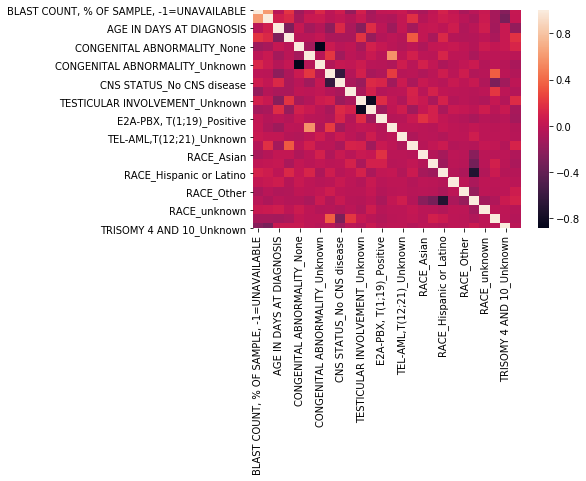

In [6]:
sns.heatmap(df.corr())

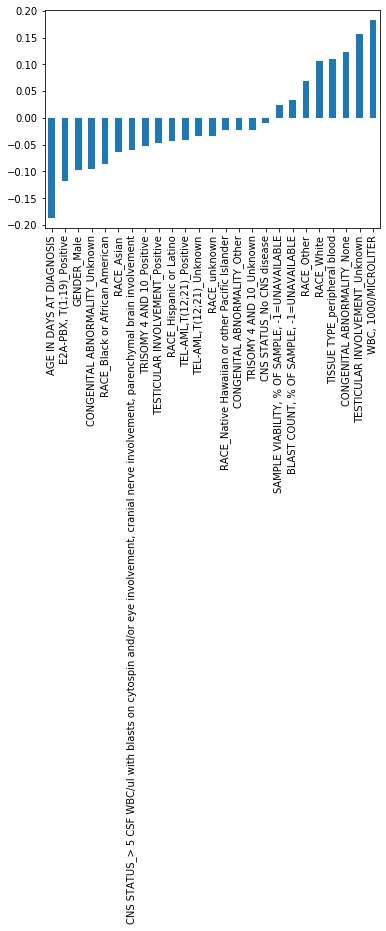

In [7]:
df.corr()['MLL_encoded'][:-1].sort_values().plot(kind='bar')

In [8]:
X = df.drop('MLL_encoded', axis = 1).values
y = df['MLL_encoded'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = Sequential()

In [12]:
print(X_train.shape)
print(X_test.shape)

(103, 25)
(104, 25)


In [13]:
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)

In [15]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=128, epochs = 1000)

Train on 103 samples, validate on 104 samples
Epoch 1/1000
103/103 [==============================] - 1s 13ms/sample - loss: 1.1710 - accuracy: 0.0971 - val_loss: 1.1341 - val_accuracy: 0.1154
Epoch 2/1000
103/103 [==============================] - 0s 194us/sample - loss: 1.1280 - accuracy: 0.0971 - val_loss: 1.0566 - val_accuracy: 0.1250
Epoch 3/1000
103/103 [==============================] - 0s 233us/sample - loss: 1.0510 - accuracy: 0.1165 - val_loss: 0.9563 - val_accuracy: 0.1346
Epoch 4/1000
103/103 [==============================] - 0s 214us/sample - loss: 0.9514 - accuracy: 0.1456 - val_loss: 0.8451 - val_accuracy: 0.1923
Epoch 5/1000
103/103 [==============================] - 0s 252us/sample - loss: 0.8414 - accuracy: 0.1942 - val_loss: 0.7345 - val_accuracy: 0.4519
Epoch 6/1000
103/103 [==============================] - 0s 223us/sample - loss: 0.7320 - accuracy: 0.5243 - val_loss: 0.6331 - val_accuracy: 0.6827
Epoch 7/1000
103/103 [==============================] - 0s 233us/sa

Epoch 56/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.3068 - accuracy: 0.8932 - val_loss: 0.3169 - val_accuracy: 0.9038
Epoch 57/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.3064 - accuracy: 0.8932 - val_loss: 0.3169 - val_accuracy: 0.9038
Epoch 58/1000
103/103 [==============================] - 0s 214us/sample - loss: 0.3059 - accuracy: 0.8932 - val_loss: 0.3169 - val_accuracy: 0.9038
Epoch 59/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.3055 - accuracy: 0.8932 - val_loss: 0.3170 - val_accuracy: 0.9038
Epoch 60/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.3051 - accuracy: 0.8932 - val_loss: 0.3170 - val_accuracy: 0.9038
Epoch 61/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.3048 - accuracy: 0.8932 - val_loss: 0.3170 - val_accuracy: 0.9038
Epoch 62/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.3044 - accuracy: 0.8932

Epoch 111/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.2875 - accuracy: 0.8932 - val_loss: 0.3179 - val_accuracy: 0.9038
Epoch 112/1000
103/103 [==============================] - 0s 291us/sample - loss: 0.2872 - accuracy: 0.8932 - val_loss: 0.3180 - val_accuracy: 0.9038
Epoch 113/1000
103/103 [==============================] - 0s 204us/sample - loss: 0.2869 - accuracy: 0.8932 - val_loss: 0.3181 - val_accuracy: 0.9038
Epoch 114/1000
103/103 [==============================] - 0s 155us/sample - loss: 0.2866 - accuracy: 0.8932 - val_loss: 0.3181 - val_accuracy: 0.9038
Epoch 115/1000
103/103 [==============================] - 0s 185us/sample - loss: 0.2863 - accuracy: 0.8932 - val_loss: 0.3182 - val_accuracy: 0.9038
Epoch 116/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.2860 - accuracy: 0.8932 - val_loss: 0.3183 - val_accuracy: 0.9038
Epoch 117/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.2857 - accuracy:

Epoch 166/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.2729 - accuracy: 0.8932 - val_loss: 0.3222 - val_accuracy: 0.9038
Epoch 167/1000
103/103 [==============================] - 0s 194us/sample - loss: 0.2726 - accuracy: 0.8932 - val_loss: 0.3223 - val_accuracy: 0.9038
Epoch 168/1000
103/103 [==============================] - 0s 174us/sample - loss: 0.2724 - accuracy: 0.8932 - val_loss: 0.3224 - val_accuracy: 0.9038
Epoch 169/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.2722 - accuracy: 0.8932 - val_loss: 0.3225 - val_accuracy: 0.9038
Epoch 170/1000
103/103 [==============================] - 0s 155us/sample - loss: 0.2719 - accuracy: 0.8932 - val_loss: 0.3226 - val_accuracy: 0.9038
Epoch 171/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.2717 - accuracy: 0.8932 - val_loss: 0.3227 - val_accuracy: 0.9038
Epoch 172/1000
103/103 [==============================] - 0s 194us/sample - loss: 0.2714 - accuracy:

Epoch 221/1000
103/103 [==============================] - 0s 185us/sample - loss: 0.2606 - accuracy: 0.8932 - val_loss: 0.3270 - val_accuracy: 0.9038
Epoch 222/1000
103/103 [==============================] - 0s 223us/sample - loss: 0.2604 - accuracy: 0.8932 - val_loss: 0.3271 - val_accuracy: 0.9038
Epoch 223/1000
103/103 [==============================] - 0s 194us/sample - loss: 0.2601 - accuracy: 0.8932 - val_loss: 0.3272 - val_accuracy: 0.9038
Epoch 224/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.2599 - accuracy: 0.8932 - val_loss: 0.3273 - val_accuracy: 0.9038
Epoch 225/1000
103/103 [==============================] - 0s 214us/sample - loss: 0.2597 - accuracy: 0.8932 - val_loss: 0.3274 - val_accuracy: 0.9038
Epoch 226/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.2595 - accuracy: 0.8932 - val_loss: 0.3275 - val_accuracy: 0.9038
Epoch 227/1000
103/103 [==============================] - 0s 194us/sample - loss: 0.2593 - accuracy:

Epoch 276/1000
103/103 [==============================] - 0s 156us/sample - loss: 0.2485 - accuracy: 0.8932 - val_loss: 0.3324 - val_accuracy: 0.9038
Epoch 277/1000
103/103 [==============================] - 0s 204us/sample - loss: 0.2482 - accuracy: 0.8932 - val_loss: 0.3325 - val_accuracy: 0.9038
Epoch 278/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.2480 - accuracy: 0.8932 - val_loss: 0.3326 - val_accuracy: 0.9038
Epoch 279/1000
103/103 [==============================] - 0s 185us/sample - loss: 0.2478 - accuracy: 0.8932 - val_loss: 0.3327 - val_accuracy: 0.9038
Epoch 280/1000
103/103 [==============================] - 0s 155us/sample - loss: 0.2476 - accuracy: 0.8932 - val_loss: 0.3328 - val_accuracy: 0.9038
Epoch 281/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.2473 - accuracy: 0.8932 - val_loss: 0.3329 - val_accuracy: 0.9038
Epoch 282/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.2471 - accuracy:

Epoch 331/1000
103/103 [==============================] - 0s 155us/sample - loss: 0.2363 - accuracy: 0.8932 - val_loss: 0.3378 - val_accuracy: 0.8942
Epoch 332/1000
103/103 [==============================] - 0s 204us/sample - loss: 0.2361 - accuracy: 0.8932 - val_loss: 0.3379 - val_accuracy: 0.8942
Epoch 333/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.2359 - accuracy: 0.8932 - val_loss: 0.3380 - val_accuracy: 0.8942
Epoch 334/1000
103/103 [==============================] - 0s 136us/sample - loss: 0.2357 - accuracy: 0.8932 - val_loss: 0.3381 - val_accuracy: 0.8942
Epoch 335/1000
103/103 [==============================] - 0s 146us/sample - loss: 0.2354 - accuracy: 0.8932 - val_loss: 0.3382 - val_accuracy: 0.8942
Epoch 336/1000
103/103 [==============================] - 0s 136us/sample - loss: 0.2352 - accuracy: 0.9029 - val_loss: 0.3382 - val_accuracy: 0.8942
Epoch 337/1000
103/103 [==============================] - 0s 146us/sample - loss: 0.2350 - accuracy:

Epoch 386/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.2246 - accuracy: 0.9029 - val_loss: 0.3431 - val_accuracy: 0.8942
Epoch 387/1000
103/103 [==============================] - 0s 155us/sample - loss: 0.2244 - accuracy: 0.9029 - val_loss: 0.3432 - val_accuracy: 0.8942
Epoch 388/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.2242 - accuracy: 0.9029 - val_loss: 0.3433 - val_accuracy: 0.8942
Epoch 389/1000
103/103 [==============================] - 0s 155us/sample - loss: 0.2240 - accuracy: 0.9029 - val_loss: 0.3434 - val_accuracy: 0.8942
Epoch 390/1000
103/103 [==============================] - 0s 204us/sample - loss: 0.2238 - accuracy: 0.9029 - val_loss: 0.3435 - val_accuracy: 0.8942
Epoch 391/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.2235 - accuracy: 0.9029 - val_loss: 0.3436 - val_accuracy: 0.8942
Epoch 392/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.2233 - accuracy:

Epoch 441/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.2134 - accuracy: 0.9029 - val_loss: 0.3483 - val_accuracy: 0.8942
Epoch 442/1000
103/103 [==============================] - 0s 204us/sample - loss: 0.2132 - accuracy: 0.9029 - val_loss: 0.3484 - val_accuracy: 0.8942
Epoch 443/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.2130 - accuracy: 0.9029 - val_loss: 0.3485 - val_accuracy: 0.8942
Epoch 444/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.2128 - accuracy: 0.9029 - val_loss: 0.3486 - val_accuracy: 0.8942
Epoch 445/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.2126 - accuracy: 0.9029 - val_loss: 0.3487 - val_accuracy: 0.8942
Epoch 446/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.2124 - accuracy: 0.9029 - val_loss: 0.3488 - val_accuracy: 0.8942
Epoch 447/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.2122 - accuracy:

Epoch 496/1000
103/103 [==============================] - 0s 185us/sample - loss: 0.2027 - accuracy: 0.9029 - val_loss: 0.3538 - val_accuracy: 0.8942
Epoch 497/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.2025 - accuracy: 0.9029 - val_loss: 0.3539 - val_accuracy: 0.8942
Epoch 498/1000
103/103 [==============================] - 0s 146us/sample - loss: 0.2023 - accuracy: 0.9029 - val_loss: 0.3540 - val_accuracy: 0.8942
Epoch 499/1000
103/103 [==============================] - 0s 146us/sample - loss: 0.2021 - accuracy: 0.9029 - val_loss: 0.3541 - val_accuracy: 0.8942
Epoch 500/1000
103/103 [==============================] - 0s 155us/sample - loss: 0.2019 - accuracy: 0.9029 - val_loss: 0.3542 - val_accuracy: 0.8942
Epoch 501/1000
103/103 [==============================] - 0s 194us/sample - loss: 0.2017 - accuracy: 0.9029 - val_loss: 0.3544 - val_accuracy: 0.8942
Epoch 502/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.2015 - accuracy:

Epoch 551/1000
103/103 [==============================] - 0s 204us/sample - loss: 0.1930 - accuracy: 0.9126 - val_loss: 0.3606 - val_accuracy: 0.8942
Epoch 552/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.1928 - accuracy: 0.9126 - val_loss: 0.3607 - val_accuracy: 0.8942
Epoch 553/1000
103/103 [==============================] - 0s 204us/sample - loss: 0.1926 - accuracy: 0.9126 - val_loss: 0.3609 - val_accuracy: 0.8942
Epoch 554/1000
103/103 [==============================] - 0s 204us/sample - loss: 0.1925 - accuracy: 0.9126 - val_loss: 0.3610 - val_accuracy: 0.8942
Epoch 555/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.1923 - accuracy: 0.9126 - val_loss: 0.3611 - val_accuracy: 0.8942
Epoch 556/1000
103/103 [==============================] - 0s 155us/sample - loss: 0.1921 - accuracy: 0.9126 - val_loss: 0.3612 - val_accuracy: 0.8942
Epoch 557/1000
103/103 [==============================] - 0s 189us/sample - loss: 0.1920 - accuracy:

Epoch 606/1000
103/103 [==============================] - 0s 194us/sample - loss: 0.1840 - accuracy: 0.9223 - val_loss: 0.3680 - val_accuracy: 0.8846
Epoch 607/1000
103/103 [==============================] - 0s 180us/sample - loss: 0.1838 - accuracy: 0.9223 - val_loss: 0.3681 - val_accuracy: 0.8846
Epoch 608/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.1836 - accuracy: 0.9223 - val_loss: 0.3683 - val_accuracy: 0.8846
Epoch 609/1000
103/103 [==============================] - 0s 194us/sample - loss: 0.1835 - accuracy: 0.9126 - val_loss: 0.3685 - val_accuracy: 0.8846
Epoch 610/1000
103/103 [==============================] - 0s 194us/sample - loss: 0.1833 - accuracy: 0.9126 - val_loss: 0.3686 - val_accuracy: 0.8846
Epoch 611/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.1831 - accuracy: 0.9126 - val_loss: 0.3687 - val_accuracy: 0.8846
Epoch 612/1000
103/103 [==============================] - 0s 159us/sample - loss: 0.1830 - accuracy:

Epoch 661/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.1751 - accuracy: 0.9029 - val_loss: 0.3757 - val_accuracy: 0.8846
Epoch 662/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.1750 - accuracy: 0.9029 - val_loss: 0.3759 - val_accuracy: 0.8846
Epoch 663/1000
103/103 [==============================] - 0s 204us/sample - loss: 0.1748 - accuracy: 0.9029 - val_loss: 0.3760 - val_accuracy: 0.8846
Epoch 664/1000
103/103 [==============================] - 0s 172us/sample - loss: 0.1747 - accuracy: 0.9029 - val_loss: 0.3761 - val_accuracy: 0.8846
Epoch 665/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.1745 - accuracy: 0.9029 - val_loss: 0.3763 - val_accuracy: 0.8846
Epoch 666/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.1744 - accuracy: 0.9029 - val_loss: 0.3764 - val_accuracy: 0.8846
Epoch 667/1000
103/103 [==============================] - 0s 194us/sample - loss: 0.1742 - accuracy:

Epoch 716/1000
103/103 [==============================] - 0s 223us/sample - loss: 0.1672 - accuracy: 0.9126 - val_loss: 0.3832 - val_accuracy: 0.8750
Epoch 717/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.1671 - accuracy: 0.9126 - val_loss: 0.3833 - val_accuracy: 0.8750
Epoch 718/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.1669 - accuracy: 0.9126 - val_loss: 0.3835 - val_accuracy: 0.8750
Epoch 719/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.1668 - accuracy: 0.9126 - val_loss: 0.3836 - val_accuracy: 0.8750
Epoch 720/1000
103/103 [==============================] - 0s 151us/sample - loss: 0.1666 - accuracy: 0.9126 - val_loss: 0.3838 - val_accuracy: 0.8750
Epoch 721/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.1665 - accuracy: 0.9126 - val_loss: 0.3839 - val_accuracy: 0.8750
Epoch 722/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.1664 - accuracy:

Epoch 771/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.1600 - accuracy: 0.9126 - val_loss: 0.3907 - val_accuracy: 0.8750
Epoch 772/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.1598 - accuracy: 0.9126 - val_loss: 0.3909 - val_accuracy: 0.8750
Epoch 773/1000
103/103 [==============================] - 0s 204us/sample - loss: 0.1597 - accuracy: 0.9126 - val_loss: 0.3911 - val_accuracy: 0.8750
Epoch 774/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.1596 - accuracy: 0.9126 - val_loss: 0.3912 - val_accuracy: 0.8750
Epoch 775/1000
103/103 [==============================] - 0s 155us/sample - loss: 0.1595 - accuracy: 0.9126 - val_loss: 0.3913 - val_accuracy: 0.8750
Epoch 776/1000
103/103 [==============================] - 0s 155us/sample - loss: 0.1593 - accuracy: 0.9126 - val_loss: 0.3915 - val_accuracy: 0.8750
Epoch 777/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.1592 - accuracy:

Epoch 826/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.1530 - accuracy: 0.9126 - val_loss: 0.3983 - val_accuracy: 0.8750
Epoch 827/1000
103/103 [==============================] - 0s 204us/sample - loss: 0.1529 - accuracy: 0.9126 - val_loss: 0.3984 - val_accuracy: 0.8750
Epoch 828/1000
103/103 [==============================] - 0s 185us/sample - loss: 0.1528 - accuracy: 0.9126 - val_loss: 0.3986 - val_accuracy: 0.8750
Epoch 829/1000
103/103 [==============================] - 0s 185us/sample - loss: 0.1527 - accuracy: 0.9126 - val_loss: 0.3987 - val_accuracy: 0.8750
Epoch 830/1000
103/103 [==============================] - 0s 204us/sample - loss: 0.1525 - accuracy: 0.9126 - val_loss: 0.3989 - val_accuracy: 0.8750
Epoch 831/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.1524 - accuracy: 0.9126 - val_loss: 0.3991 - val_accuracy: 0.8750
Epoch 832/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.1523 - accuracy:

Epoch 881/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.1467 - accuracy: 0.9223 - val_loss: 0.4059 - val_accuracy: 0.8654
Epoch 882/1000
103/103 [==============================] - 0s 194us/sample - loss: 0.1466 - accuracy: 0.9223 - val_loss: 0.4061 - val_accuracy: 0.8654
Epoch 883/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.1465 - accuracy: 0.9223 - val_loss: 0.4062 - val_accuracy: 0.8654
Epoch 884/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.1464 - accuracy: 0.9223 - val_loss: 0.4064 - val_accuracy: 0.8654
Epoch 885/1000
103/103 [==============================] - 0s 194us/sample - loss: 0.1463 - accuracy: 0.9223 - val_loss: 0.4065 - val_accuracy: 0.8654
Epoch 886/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.1462 - accuracy: 0.9223 - val_loss: 0.4067 - val_accuracy: 0.8654
Epoch 887/1000
103/103 [==============================] - 0s 146us/sample - loss: 0.1461 - accuracy:

Epoch 936/1000
103/103 [==============================] - 0s 194us/sample - loss: 0.1410 - accuracy: 0.9320 - val_loss: 0.4132 - val_accuracy: 0.8654
Epoch 937/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.1409 - accuracy: 0.9320 - val_loss: 0.4133 - val_accuracy: 0.8654
Epoch 938/1000
103/103 [==============================] - 0s 146us/sample - loss: 0.1408 - accuracy: 0.9320 - val_loss: 0.4134 - val_accuracy: 0.8654
Epoch 939/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.1407 - accuracy: 0.9320 - val_loss: 0.4135 - val_accuracy: 0.8654
Epoch 940/1000
103/103 [==============================] - 0s 214us/sample - loss: 0.1406 - accuracy: 0.9320 - val_loss: 0.4137 - val_accuracy: 0.8654
Epoch 941/1000
103/103 [==============================] - 0s 155us/sample - loss: 0.1405 - accuracy: 0.9320 - val_loss: 0.4139 - val_accuracy: 0.8654
Epoch 942/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.1404 - accuracy:

Epoch 991/1000
103/103 [==============================] - 0s 165us/sample - loss: 0.1362 - accuracy: 0.9320 - val_loss: 0.4202 - val_accuracy: 0.8750
Epoch 992/1000
103/103 [==============================] - 0s 155us/sample - loss: 0.1361 - accuracy: 0.9320 - val_loss: 0.4204 - val_accuracy: 0.8750
Epoch 993/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.1360 - accuracy: 0.9320 - val_loss: 0.4206 - val_accuracy: 0.8750
Epoch 994/1000
103/103 [==============================] - 0s 175us/sample - loss: 0.1359 - accuracy: 0.9320 - val_loss: 0.4207 - val_accuracy: 0.8750
Epoch 995/1000
103/103 [==============================] - 0s 185us/sample - loss: 0.1358 - accuracy: 0.9320 - val_loss: 0.4208 - val_accuracy: 0.8750
Epoch 996/1000
103/103 [==============================] - 0s 156us/sample - loss: 0.1357 - accuracy: 0.9320 - val_loss: 0.4208 - val_accuracy: 0.8750
Epoch 997/1000
103/103 [==============================] - 0s 176us/sample - loss: 0.1357 - accuracy:

In [16]:
loss = pd.DataFrame(model.history.history)

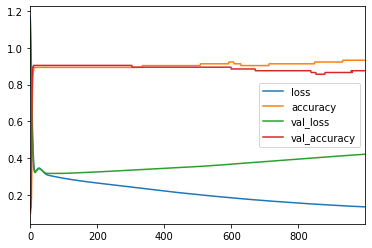

In [17]:
loss.plot();

In [18]:
predict = model.predict_classes(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        94
           1       0.00      0.00      0.00        10

    accuracy                           0.88       104
   macro avg       0.45      0.48      0.47       104
weighted avg       0.81      0.88      0.84       104



In [19]:
X = df.drop('MLL_encoded', axis = 1).values
y = df['MLL_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model2 = Sequential()
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)

model2.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=128, epochs = 1000, callbacks=[early_stop])

Train on 103 samples, validate on 104 samples
Epoch 1/1000
103/103 [==============================] - 1s 7ms/sample - loss: 0.5944 - accuracy: 0.8252 - val_loss: 0.5808 - val_accuracy: 0.8750
Epoch 2/1000
103/103 [==============================] - 0s 213us/sample - loss: 0.5890 - accuracy: 0.8252 - val_loss: 0.5692 - val_accuracy: 0.8750
Epoch 3/1000
103/103 [==============================] - 0s 225us/sample - loss: 0.5790 - accuracy: 0.8252 - val_loss: 0.5534 - val_accuracy: 0.8750
Epoch 4/1000
103/103 [==============================] - 0s 214us/sample - loss: 0.5653 - accuracy: 0.8350 - val_loss: 0.5343 - val_accuracy: 0.8942
Epoch 5/1000
103/103 [==============================] - 0s 214us/sample - loss: 0.5489 - accuracy: 0.8544 - val_loss: 0.5132 - val_accuracy: 0.8942
Epoch 6/1000
103/103 [==============================] - 0s 223us/sample - loss: 0.5307 - accuracy: 0.8544 - val_loss: 0.4909 - val_accuracy: 0.8942
Epoch 7/1000
103/103 [==============================] - 0s 194us/sam

Epoch 56/1000
103/103 [==============================] - 0s 184us/sample - loss: 0.3405 - accuracy: 0.8835 - val_loss: 0.2954 - val_accuracy: 0.9135
Epoch 00056: early stopping


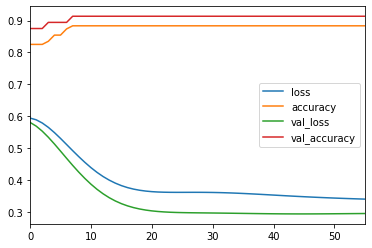

In [20]:
loss = pd.DataFrame(model2.history.history)
loss.plot();

In [21]:
predict = model2.predict_classes(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        95
           1       0.00      0.00      0.00         9

    accuracy                           0.91       104
   macro avg       0.46      0.50      0.48       104
weighted avg       0.83      0.91      0.87       104



c:\users\max\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
